# K-means clustering method using average annual percentage return and volatilities over a theoretical one year period

In [143]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# data = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-20", end="2021-05-20")
# pan = data[["Adj Close","Volume"]]
data = yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2011-05-20", end="2021-05-20")
pan = data[["Adj Close","Volume"]]

[*********************100%***********************]  20 of 20 completed


In [144]:
prices_df = pan["Adj Close"]
train_prices_df, test_prices_df = train_test_split(prices_df, test_size=0.2, random_state=42, shuffle=False)

In [145]:
# k-means on training data

In [146]:
train_prices_df

,BAC,BCS,BNPQY,BNS,C,CS,GS,HDB,HSBC,JPM,LYG,MS,PNC,RY,SCHW,TD,TFC,UBS,USB,WFC
Date,,,,,,,,,,,,,,,,,,,,
2011-05-19,10.217743,12.834218,26.009302,38.390888,36.145077,29.249418,119.348732,14.833581,30.952944,33.291256,2.739781,20.195780,48.373867,42.301365,15.578585,29.621403,20.067228,14.420515,19.813374,21.381483
2011-05-20,10.121597,12.614285,25.608244,38.149796,35.830624,29.171848,115.622910,14.786564,30.708990,32.632988,2.644484,19.805164,47.375179,42.171463,15.313341,29.570139,19.516129,14.203665,19.345104,20.925606
2011-05-23,9.981748,12.280837,25.040247,37.712025,35.079422,28.720551,116.350922,14.555243,30.131813,32.194149,2.580953,19.688805,46.929638,41.583477,15.198402,29.477863,19.178120,13.932602,19.137833,20.574354
2011-05-24,10.016708,12.280837,25.074883,37.775471,35.385147,28.727602,116.779190,14.610723,30.054462,32.035255,2.533305,19.555830,46.614670,41.638165,15.322183,29.330898,19.258949,13.870645,19.160864,20.649084
2011-05-25,9.946785,12.585903,25.594391,37.997532,35.236618,29.475065,116.693542,14.512930,30.280577,31.982307,2.596836,19.580769,46.944996,41.781750,15.472486,29.659006,19.596951,14.180430,19.122475,20.596771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-14,27.256250,7.606107,23.181927,47.471714,60.872921,11.398154,187.813004,57.678493,38.378349,103.506302,2.998740,41.685356,120.897499,71.453606,42.921913,50.259369,44.486950,10.845539,47.420773,43.543602
2019-05-15,26.941975,7.653001,23.081570,47.409000,60.509144,11.398154,187.927856,57.042976,38.751659,103.112236,2.998740,41.581173,119.891273,71.646622,41.373089,50.378296,44.070225,10.827171,47.179256,42.934792
2019-05-16,27.227682,7.690516,23.355267,47.588177,61.544521,11.455817,190.549637,58.100517,38.908287,104.435150,2.989098,41.941093,122.145996,71.913177,42.341110,50.561260,44.625854,11.010839,47.838787,42.990990


In [147]:
# train = [yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-20", end="2013-05-19"), \
#          yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2013-05-20", end="2015-05-19"), \
#          yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2015-05-20", end="2017-05-19"), \
#          yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2017-05-20", end="2019-05-19")
#         ]
train = [yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2011-05-20", end="2012-11-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2012-11-20", end="2013-05-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2013-05-20", end="2014-11-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2014-11-20", end="2015-05-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2015-05-20", end="2016-11-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2016-11-20", end="2017-05-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2017-05-20", end="2018-11-19"), \
         yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2018-11-20", end="2019-05-19")
       ]


[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


{'BAC': [2, 2, 2, 3, 3, 1, 1, 3],
 'BCS': [2, 2, 1, 1, 1, 1, 3, 3],
 'BNPQY': [2, 1, 0, 1, 0, 3, 3, 3],
 'BNS': [3, 0, 3, 0, 2, 0, 0, 0],
 'C': [2, 2, 0, 3, 0, 1, 2, 3],
 'CS': [0, 2, 1, 3, 1, 1, 3, 3],
 'GS': [3, 2, 3, 1, 2, 0, 0, 0],
 'HDB': [1, 0, 2, 1, 3, 3, 1, 2],
 'HSBC': [3, 1, 1, 3, 2, 1, 0, 0],
 'JPM': [3, 2, 3, 1, 3, 1, 1, 0],
 'LYG': [2, 2, 2, 1, 1, 3, 3, 3],
 'MS': [0, 3, 2, 1, 0, 0, 2, 3],
 'PNC': [3, 2, 3, 1, 3, 1, 1, 1],
 'RY': [3, 0, 3, 0, 2, 0, 0, 0],
 'SCHW': [0, 3, 2, 1, 3, 0, 1, 1],
 'TD': [3, 0, 3, 0, 2, 2, 1, 0],
 'TFC': [1, 1, 3, 3, 3, 2, 1, 1],
 'UBS': [2, 1, 1, 2, 1, 1, 3, 1],
 'USB': [1, 0, 3, 3, 3, 0, 0, 1],
 'WFC': [1, 1, 2, 3, 2, 0, 0, 1]}

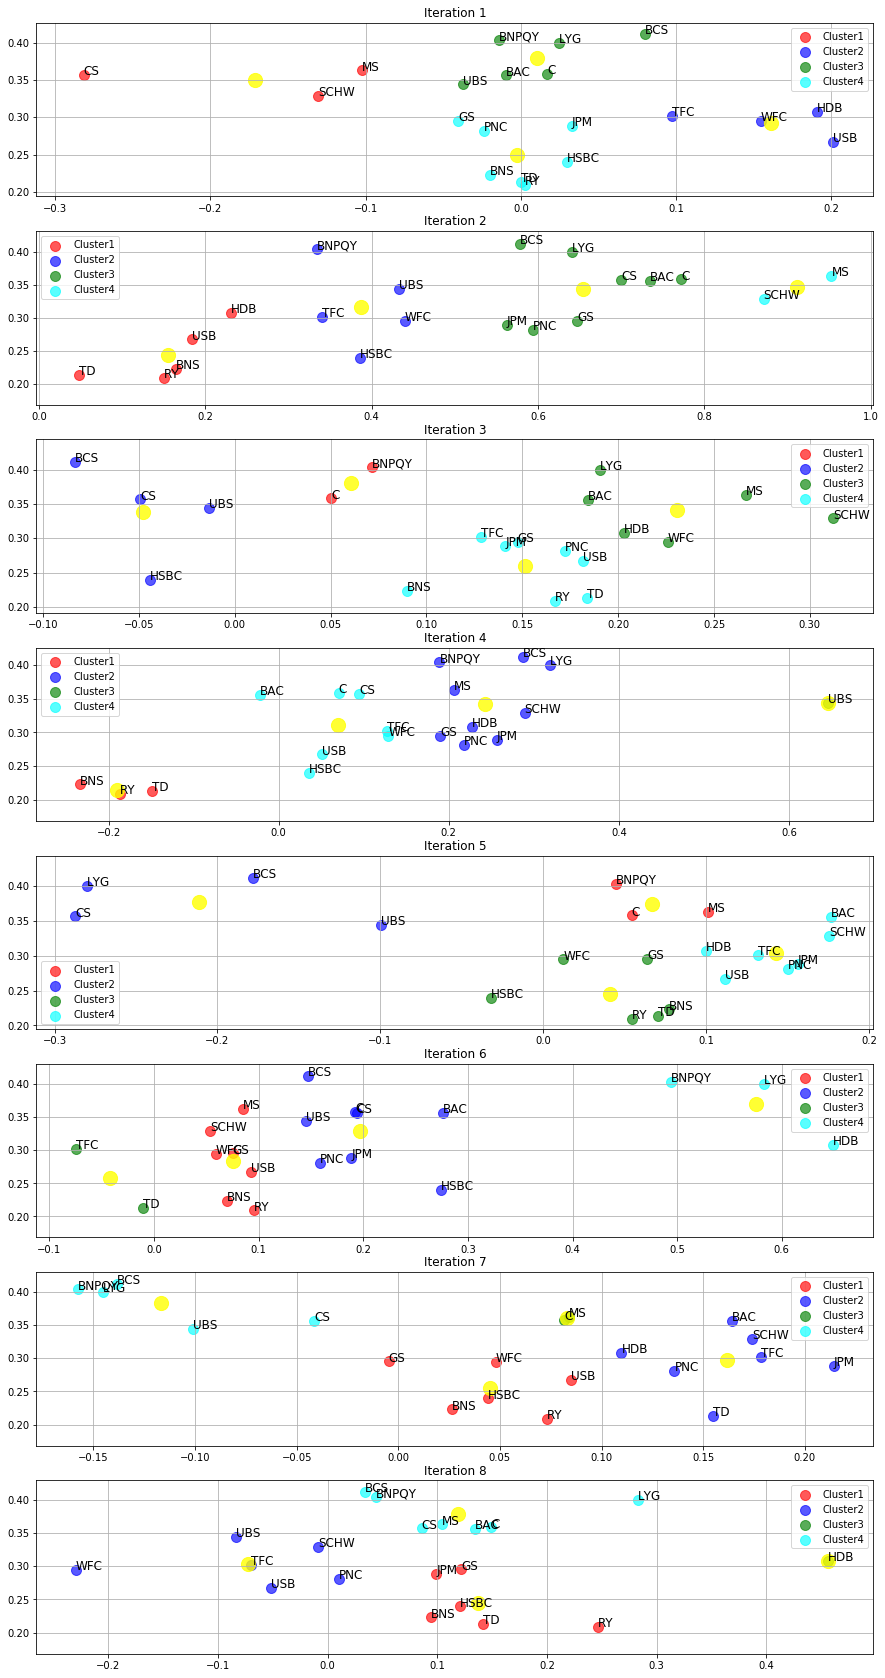

In [156]:
cluster_dict = {}
valid_assets = []
text = ['BAC','BCS','BNPQY','BNS','C','CS','GS','HDB','HSBC','JPM','LYG','MS','PNC','RY','SCHW','TD','TFC','UBS','USB','WFC']
fig, ax = plt.subplots(8, figsize=(15, 30))
for i in range(len(train)):
    #Calculate average annual percentage return and volatilities over a theoretical one year period
    returns = train[i]['Adj Close'].pct_change().mean() * 252
    returns = pd.DataFrame(returns)
    #print(returns)
    returns.columns = ['Returns']
    returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
    #print(returns['Volatility'])
    #format the data as a numpy array to feed into the K-Means algorithm
    data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
    #removing NaN values, replacing them by 0
    cleaned_data = np.where(np.isnan(data), 0, data)
    #cleaned_data
    
    #the change in slope of curve is not significant after k=3. Hence we select no. of clusters to be 3
    # computing K-Means with K = 3 (3 clusters)
    K=4
    train_centroids,_ = kmeans(cleaned_data,K)
    # assign each sample to a cluster
    idx,_ = vq(cleaned_data,train_centroids)
    data = cleaned_data
    
    #Finally to get the details of which stock is actually in which cluster we can run the following line 
    # of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
    details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
    
    labels =['Stock Symbol', 'Cluster']
    df = pd.DataFrame.from_records(details, columns=labels)
    
    valid_assets = []
    if i==0:
        for j in range(len(list(df["Cluster"]))):
            cluster_dict[list(df["Stock Symbol"])[j]] = [list(df["Cluster"])[j]]
    else:
        j=0
        for key in cluster_dict:
            cluster_dict[key].append(list(df["Cluster"])[j])
            j+=1
    #using scatter plt 
    X = cleaned_data
    for index in range(len(X)):
        ax[i].text(x=X[index][0], y=X[index][1], s=text[index], size='large')
    ax[i].scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
    ax[i].scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
    ax[i].scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
    ax[i].scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
    # plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
    # plt.scatter(X[idx==5,0],X[idx==5,1],s=100,c='grey',label='Cluster6',alpha=0.65)
    #plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
    ax[i].scatter(train_centroids[:,0],train_centroids[:,1],s=200, c='yellow', alpha = 0.8)
    ax[i].legend()
    ax[i].set_title("Iteration "+ str(i+1))
    ax[i].grid()
cluster_dict          

In [115]:
rs = test_prices_df.apply(np.log).diff(1) 
rs_nokmeans = rs.transpose().mean().dropna()
rs_nokmeans

Date
2019-05-22   -0.012350
2019-05-23   -0.015088
2019-05-24   -0.001432
2019-05-28   -0.001323
2019-05-29   -0.006803
                ...   
2021-05-13    0.007187
2021-05-14    0.019782
2021-05-17   -0.005313
2021-05-18   -0.010765
2021-05-19    0.001887
Length: 503, dtype: float64

In [116]:
rs_kmeans = rs.dropna().transpose().iloc[[1,4,10,19,15,3],:].mean() #tech
rs_kmeans

Date
2019-05-22   -0.008168
2019-05-23   -0.018493
2019-05-24   -0.004367
2019-05-28    0.017989
2019-05-29   -0.007548
                ...   
2021-05-13   -0.007956
2021-05-14    0.024410
2021-05-17   -0.004240
2021-05-18   -0.004756
2021-05-19    0.004209
Length: 503, dtype: float64

In [77]:
# #Calculate average annual percentage return and volatilities over a theoretical one year period
# returns = train[3]['Adj Close'].pct_change().mean() * 252
# returns = pd.DataFrame(returns)
# #print(returns)
# returns.columns = ['Returns']
# returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
# #print(returns['Volatility'])
# #format the data as a numpy array to feed into the K-Means algorithm
# data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
# #removing NaN values, replacing them by 0
# cleaned_data = np.where(np.isnan(data), 0, data)
# #cleaned_data
# cleaned_data

In [78]:
# #the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 3

# # computing K-Means with K = 3 (3 clusters)
# K=3
# train_centroids,_ = kmeans(cleaned_data,K)
# # assign each sample to a cluster
# idx,_ = vq(cleaned_data,train_centroids)
 
# data = cleaned_data

In [70]:
# #Finally to get the details of which stock is actually in which cluster we can run the following line 
# # of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
# details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [79]:
# labels =['Stock Symbol', 'Cluster']
# df = pd.DataFrame.from_records(details, columns=labels)
# df

In [81]:
# cluster_dict = {}
# for i in range(len(list(df["Cluster"]))):
#     cluster_dict[list(df["Stock Symbol"])[i]] = list(df["Cluster"])[i]
# cluster_dict

In [82]:
# X = cleaned_data
# #within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# # in cluster k from their center point ki.
# wcss = []
# for k in range(2, 20):
#     k_means = KMeans(n_clusters=k)
#     k_means.fit(X)
#     wcss.append(k_means.inertia_)

# # fig = plt.figure(figsize=(15, 5))
# # plt.plot(range(2, 20), wcss)
# # plt.grid(True)
# # plt.title('Elbow curve')
# # plt.show()

In [83]:
# #using scatter plt 
# plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
# plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
# plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
# # plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
# # plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
# # plt.scatter(X[idx==5,0],X[idx==5,1],s=100,c='grey',label='Cluster6',alpha=0.65)
# #plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
# plt.scatter(train_centroids[:,0],train_centroids[:,1],s=200, c='yellow', alpha = 0.8)
# plt.legend()
# plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Start date,2019-05-22
End date,2021-05-19
Total months,23
,Backtest
Annual return,30.477%
Cumulative returns,70.063%
Annual volatility,30.529%
Sharpe ratio,1.03
Calmar ratio,0.95
Stability,0.89
Max drawdown,-32.197%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.20,2020-02-19,2020-03-20,2020-07-20,109
1,11.93,2020-09-02,2020-09-23,2020-11-25,61
2,10.02,2019-07-24,2019-08-23,2019-11-04,74
3,9.46,2021-02-12,2021-03-08,2021-04-05,37
4,7.67,2021-04-16,2021-05-12,NaT,NaN


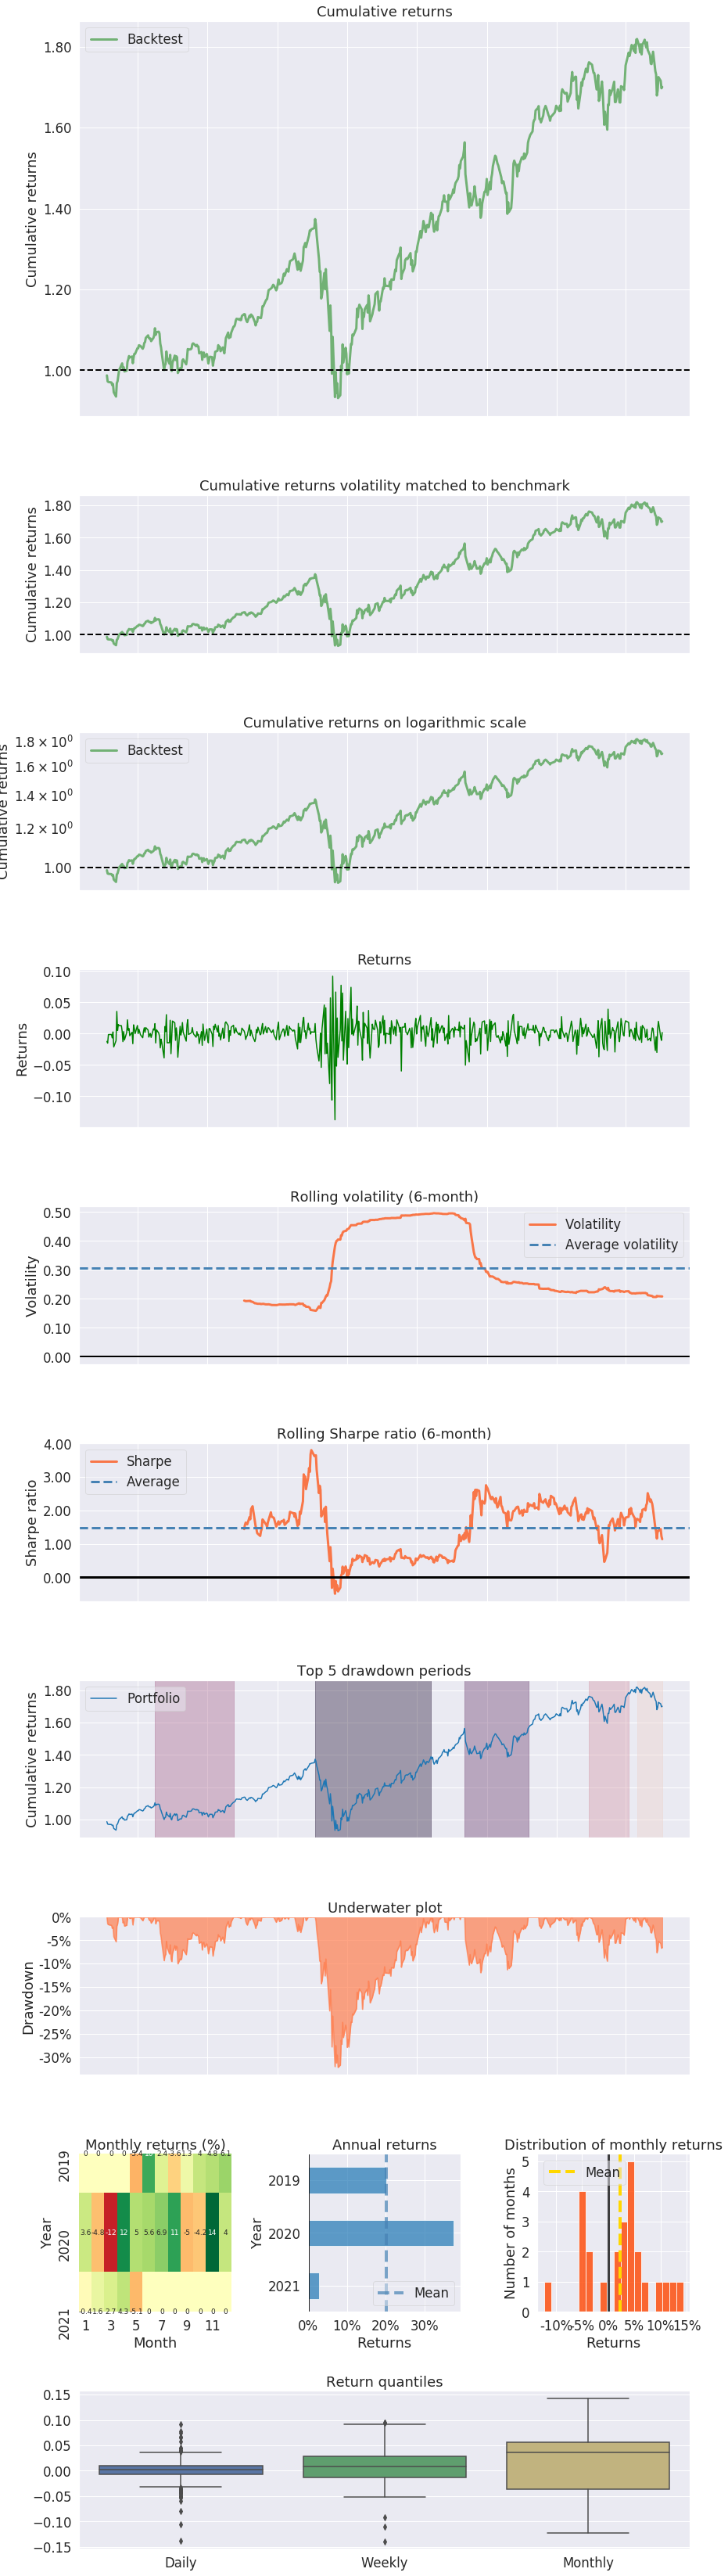

In [112]:
import pyfolio as pf
pf.create_returns_tear_sheet(rs_nokmeans)

Start date,2019-05-22
End date,2021-05-19
Total months,23
,Backtest
Annual return,48.71%
Cumulative returns,120.799%
Annual volatility,36.782%
Sharpe ratio,1.27
Calmar ratio,1.43
Stability,0.91
Max drawdown,-33.993%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.99,2020-02-19,2020-03-18,2020-06-10,81
1,18.92,2021-01-26,2021-03-08,NaT,NaN
2,16.14,2019-07-24,2019-10-08,2019-12-12,102
3,15.13,2020-09-01,2020-09-08,2020-11-27,64
4,6.69,2020-08-06,2020-08-11,2020-08-17,8


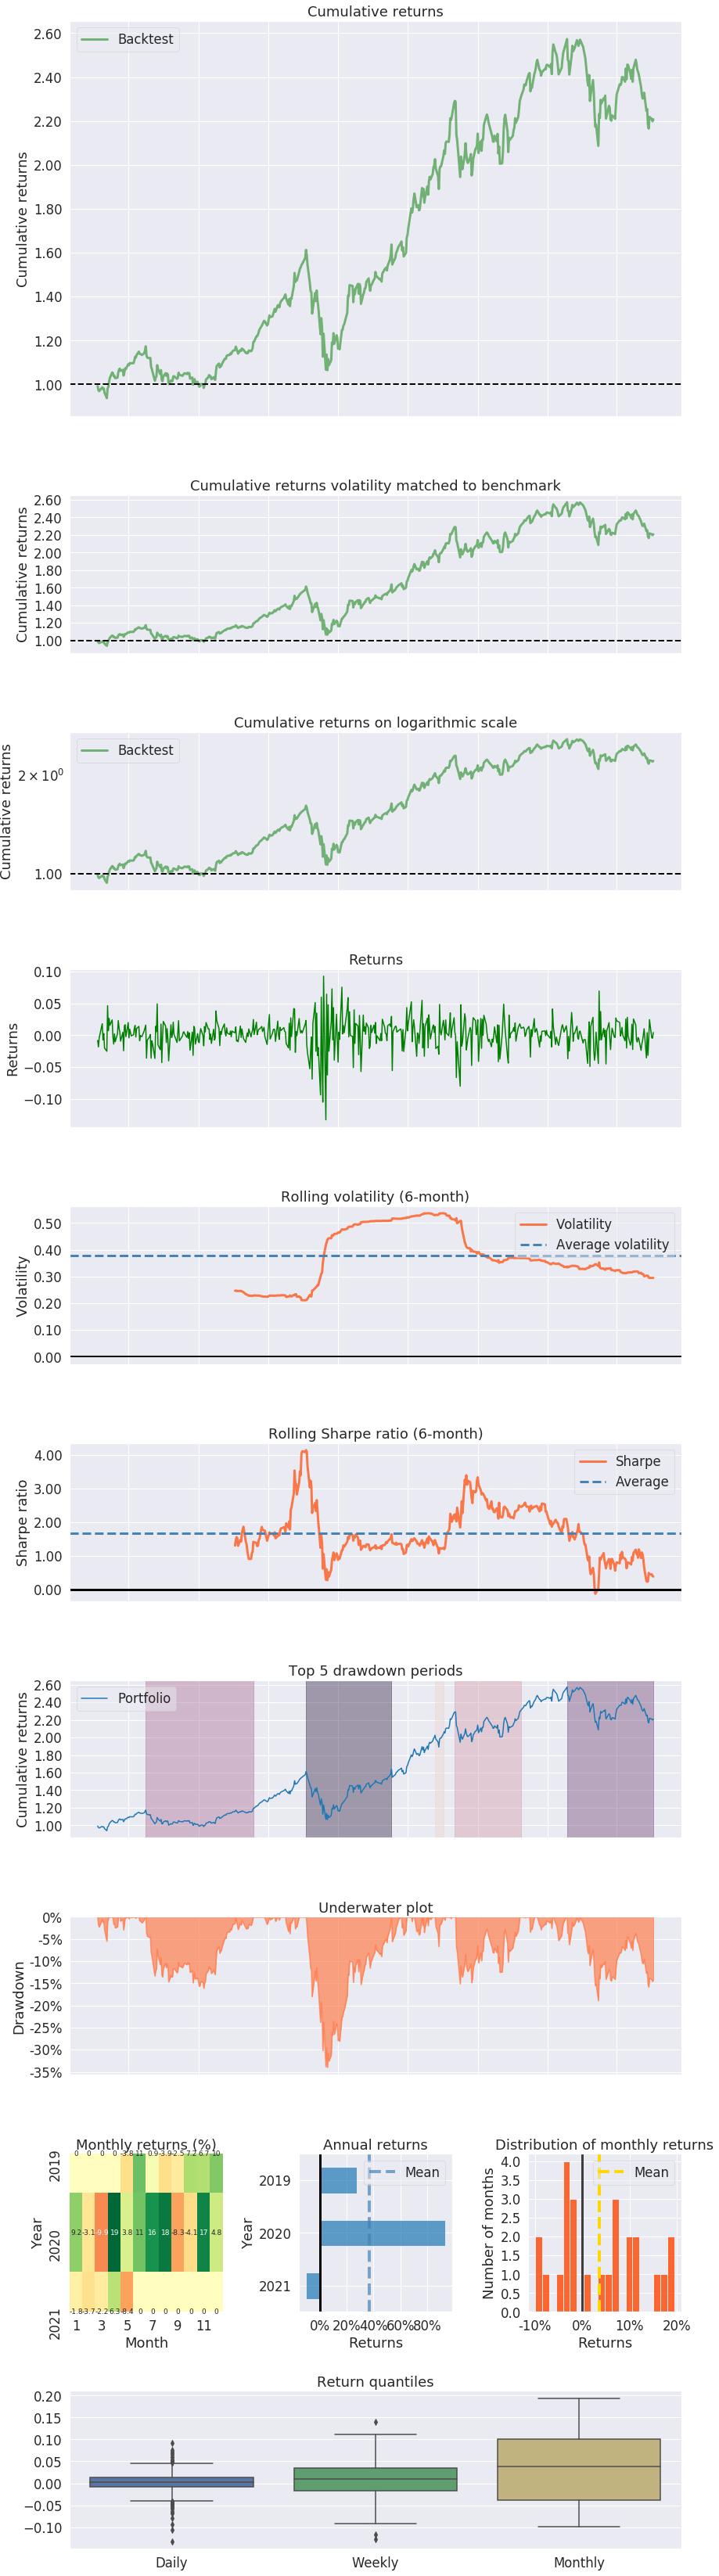

In [117]:
pf.create_returns_tear_sheet(rs_kmeans)